# Symbolic computations for the 1D disturbed study

In [112]:
import sympy as sp
sp.init_printing()

import IPython.display as disp

# 1D
# Continuous piecewise linear functions
drawing = f"""
    .____.________.
    x-1  x0      x1
    |____|________|
      hx-    hx+

"""
print(drawing)


    .____.________.
    x-1  x0      x1
    |____|________|
      hx-    hx+




In [113]:
# !!! Indicates a hypothesis (should be studied and considered)

# !!! Mode selection
mode_values = "real" # real or complex values


In [114]:
# Wavenumbers
k = sp.Symbol('k',
              #real=True, # !!!
              #positive=True, # !!!
              )
kh = sp.symbols('k^h')

# 1D variable
x = sp.symbols('x')

# 1D variational formulations over [a, b]
tau = sp.symbols('tau')
def a_G(u, v, a, b):
    D_u = sp.diff(u, x)
    D_v = sp.diff(v, x)
    return sp.integrate(D_u*D_v, (x, a, b)) - ( k**2 * sp.integrate(u*v, (x, a, b)) )
def L(u):
    return sp.diff(u, x, 2) + ( k**2 * u )
def a_GLS(u, v, a, b):
    return a_G(u, v, a, b) + ( tau * sp.integrate(L(u)*L(v), (x, a, b)) )


Galerkine coefficients


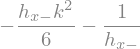

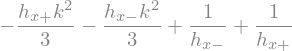

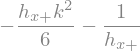

In [115]:

# h definitions
h_x_ = dict()
h_x_["-"], h_x_["+"] = sp.symbols('h_x- h_x+')
h_x = sp.symbols('h_x')

# Grid sample
x_ = dict()
x_["-1"], x_["0"], x_["+1"] = -h_x_["-"], sp.sympify(0), +h_x_["+"]

# Shape functions
N_ = dict()
N_["-1"] = - x / h_x_["-"]
N_["0-"] = (x / h_x_["-"]) + 1
N_["0+"] = (- x / h_x_["+"]) + 1
N_["+1"] = x / h_x_["+"]

# Linear system coefficients (Galerkine)
A_G_ = dict()
A_G_["0, -1"] = a_G(N_["0-"], N_["-1"], x_["-1"], x_["0"])
A_G_["0, 0"] = a_G(N_["0-"], N_["0-"], x_["-1"], x_["0"]) + a_G(N_["0+"], N_["0+"], x_["0"], x_["+1"])
A_G_["0, +1"] = a_G(N_["0+"], N_["+1"], x_["0"], x_["+1"])
# Checkpoint: another result should be equal to lambda * A_G_ with lambda any scalar (coefficients of a homogeneous system)
print("Galerkine coefficients")
for a in A_G_.values():
    disp.display(a)


In [116]:
# Numerical solution is supposedly
if mode_values == "complex":
    uh = sp.exp(1j * kh * x)
elif mode_values == "real":
    uh = sp.cos(kh * x)
Uh_ = dict()
Uh_["-1"] = uh.subs(x, x_["-1"])
Uh_["0"] = uh.subs(x, x_["0"])
Uh_["+1"] = uh.subs(x, x_["+1"])

Dispersion relation


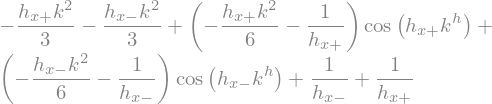

In [117]:

# Solve the A_G * Uh = 0 Galerkine stencil
dispersion_relation_G = (A_G_["0, -1"] * Uh_["-1"]) + (A_G_["0, 0"] * Uh_["0"]) + (A_G_["0, +1"] * Uh_["+1"])
print("Dispersion relation")
disp.display(dispersion_relation_G)

Galerkine dispersion
k^2 = 


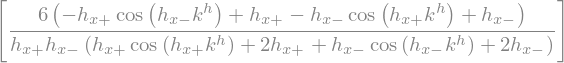

In [118]:
# for k (kh is non analytic in k when hx+ != hx-)
k2_G = sp.solve( dispersion_relation_G, k**2 )
print("Galerkine dispersion")
print("k^2 = ")
disp.display(k2_G)
k2_G = k2_G[0]


In [119]:
# Asymptotic results
alpha_ = dict()
alpha_["-"], alpha_["+"] = sp.symbols('alpha^- alpha^+', real=True, positive=True)


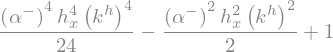

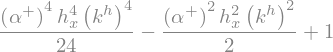

In [120]:
cos_asymptotic_ = dict()
cos_asymptotic_["-"] = sp.sympify(1) - (alpha_["-"]**2/2) * (h_x*kh)**2 + (alpha_["-"]**4/24) * (h_x*kh)**4
cos_asymptotic_["+"] = sp.sympify(1) - (alpha_["+"]**2/2) * (h_x*kh)**2 + (alpha_["+"]**4/24) * (h_x*kh)**4
disp.display(cos_asymptotic_["-"])
disp.display(cos_asymptotic_["+"])


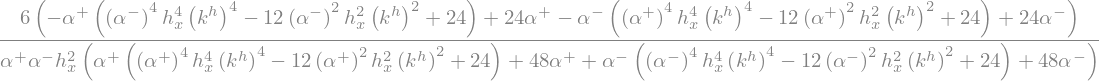

In [121]:
k2_G_asymptotic = k2_G.subs([(sp.cos(h_x_["-"]*kh), cos_asymptotic_["-"]),
                             (sp.cos(h_x_["+"]*kh), cos_asymptotic_["+"])]).subs([
                                 (h_x_["-"], alpha_["-"]*h_x),
                                 (h_x_["+"], alpha_["+"]*h_x)
                             ]).simplify()
disp.display(k2_G_asymptotic)

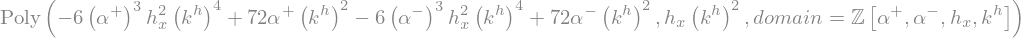

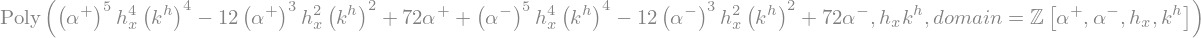

In [122]:
k2_G_asymptotic_numer, k2_G_asymptotic_denom = k2_G_asymptotic.as_numer_denom()
k2_G_asymptotic_numer = sp.Poly((k2_G_asymptotic_numer/(alpha_["-"]*alpha_["+"]*h_x*h_x)).expand(), h_x*(kh**2))
k2_G_asymptotic_denom = sp.Poly((k2_G_asymptotic_denom/(alpha_["-"]*alpha_["+"]*h_x*h_x)).expand(), h_x*kh)
disp.display(k2_G_asymptotic_numer)
disp.display(k2_G_asymptotic_denom)

Galerkine dispersion with hx+ = hx-
k^2 = 


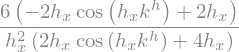

Galerkine dispersion with hx+ = hx-
kh*h = 


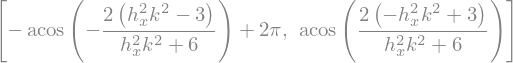

In [123]:
k2hh_G_asymptotic = k2_G_asymptotic*h_x_["-"]*h_x_["+"]
# Check for consistency with hx+ = hx-
k2_G_equal = k2_G.subs(h_x_["+"], h_x).subs(h_x_["-"], h_x)
print("Galerkine dispersion with hx+ = hx-")
print("k^2 = ")
disp.display(k2_G_equal)

# Now k^h is analytic
khh_G_equal = sp.solve(k**2 - k2_G_equal, kh*h_x)
print("Galerkine dispersion with hx+ = hx-")
print("kh*h = ")
disp.display(khh_G_equal)



In [124]:
# Linear system coefficients (GLS)
A_GLS_ = dict()
A_GLS_["0, -1"] = a_GLS(N_["0-"], N_["-1"], x_["-1"], x_["0"])
A_GLS_["0, 0"] = a_GLS(N_["0-"], N_["0-"], x_["-1"], x_["0"]) + a_GLS(N_["0+"], N_["0+"], x_["0"], x_["+1"])
A_GLS_["0, +1"] = a_GLS(N_["0+"], N_["+1"], x_["0"], x_["+1"])

In [125]:
# Construct the GLS Stencil Equation
stencil_eq = (A_GLS_["0, -1"] * Uh_["-1"]) + \
             (A_GLS_["0, 0"]  * Uh_["0"]) + \
             (A_GLS_["0, +1"] * Uh_["+1"])

In [126]:
# Match k and k^h
stencil_eq_ideal = stencil_eq.subs(kh, k)

Number of tau solutions found: 1
Optimal tau (general):


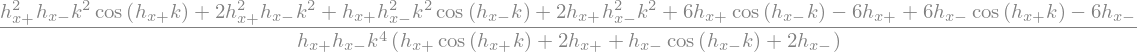

In [127]:
# Solve for tau directly
tau_solutions = sp.solve(stencil_eq_ideal, tau)

print(f"Number of tau solutions found: {len(tau_solutions)}")
tau_opt = tau_solutions[0] # 1 tau

print("Optimal tau (general):")
disp.display(tau_opt)


Checking consistency for uniform grid (hx+ = hx- = h)...
Optimal tau (uniform):


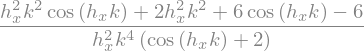

In [130]:
# Simplify and Check Consistency for Uniform Grid (hx+ = hx- = h)
print("\nChecking consistency for uniform grid (hx+ = hx- = h)...")
tau_opt_uniform = tau_opt.subs(h_x_["+"], h_x).subs(h_x_["-"], h_x)
tau_opt_uniform = sp.simplify(tau_opt_uniform)

print("Optimal tau (uniform):")
disp.display(tau_opt_uniform)